In [4]:
import rnnSMAP
import numpy as np
import pandas as pd
import torch
import argparse

import imp
imp.reload(rnnSMAP)
rnnSMAP.reload()

opt = rnnSMAP.classLSTM.optLSTM(
    rootDB=rnnSMAP.kPath['DB_L3_NA'],
    rootOut=rnnSMAP.kPath['Out_L3_NA'],
    syr=2017, eyr=2017,
    var='varLst_Forcing', varC='varConstLst_Noah',
    train='CONUSv16f1', dr=0.5, modelOpt='relu',
    target='SMAP_AM',gpu=0
)

load rnnSMAP


In [ ]:
opt['model'] = 'gru_my_mc'
opt['out'] = 'gru_my_stack_with_MC'
rnnSMAP.funLSTM.trainLSTM(opt)

out = opt['out']
rootOut = rnnSMAP.kPath['Out_L3_NA']
syr = 2015
eyr = 2016

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/APCP_FORA.csv 0.018687009811401367
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DLWRF_FORA.csv 0.016650676727294922
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DSWRF_FORA.csv 0.015809059143066406
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/TMP_2_FORA.csv 0.015515327453613281
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SPFH_2_FORA.csv 0.020402193069458008
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/VGRD_10_FORA.csv 0.02144789695739746
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/UGRD_10_FORA.csv 0.021903038024902344
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.01560211181640625
Epoch 1 Loss 0.956 time 5.27
Epoch 2 Loss 0.144 time 5.61
Epoch 3 Loss 0.183 time 5.49
Epoch 4 Loss 

Epoch 238 Loss 0.022 time 4.19
Epoch 239 Loss 0.021 time 4.19
Epoch 240 Loss 0.018 time 4.18
Epoch 241 Loss 0.017 time 4.20
Epoch 242 Loss 0.020 time 4.21
Epoch 243 Loss 0.019 time 4.14
Epoch 244 Loss 0.019 time 4.15
Epoch 245 Loss 0.020 time 4.17
Epoch 246 Loss 0.019 time 4.16
Epoch 247 Loss 0.018 time 4.53
Epoch 248 Loss 0.016 time 4.98
Epoch 249 Loss 0.018 time 4.85
Epoch 250 Loss 0.017 time 4.25
Epoch 251 Loss 0.023 time 4.21
Epoch 252 Loss 0.018 time 4.23
Epoch 253 Loss 0.017 time 4.24
Epoch 254 Loss 0.016 time 4.19
Epoch 255 Loss 0.018 time 4.18
Epoch 256 Loss 0.017 time 4.15
Epoch 257 Loss 0.018 time 4.19
Epoch 258 Loss 0.018 time 4.22
Epoch 259 Loss 0.020 time 4.19
Epoch 260 Loss 0.018 time 4.20
Epoch 261 Loss 0.017 time 4.18
Epoch 262 Loss 0.016 time 4.21
Epoch 263 Loss 0.016 time 4.17
Epoch 264 Loss 0.018 time 4.15
Epoch 265 Loss 0.017 time 4.16
Epoch 266 Loss 0.016 time 4.16
Epoch 267 Loss 0.017 time 4.16
Epoch 268 Loss 0.018 time 4.18
Epoch 269 Loss 0.019 time 4.13
Epoch 27

In [5]:
out = 'gru_my_stack_with_MC'
testName = 'CONUSv16f1'
rootDB = rnnSMAP.kPath['DB_L3_NA']
rootOut = rnnSMAP.kPath['Out_L3_NA']

In [6]:
ds1 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2017])# define dataset
ds1.readData(var='SMAP_AM', field='SMAP')# read target
ds1.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')# read prediction
statErr1 = ds1.statCalError(predField='LSTM', targetField='SMAP')# calculate error

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.04274320602416992
running test
/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/APCP_FORA.csv 0.018333911895751953
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DLWRF_FORA.csv 0.016568660736083984
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DSWRF_FORA.csv 0.015594959259033203
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/TMP_2_FORA.csv 0.014819860458374023
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SPFH_2_FORA.csv 0.02066493034362793
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/VGRD_10_FORA.csv 0.021771907806396484
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/UGRD_10_FORA.csv 0.017397642135620117


/usr/local/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'rnnSMAP.classLSTM.torchGRU_cell_my_implementation' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


saving /Users/rajdesai/Desktop/Hydro/output/L3_NA/gru_my_stack_with_MC/test_CONUSv16f1_2017_2017_ep500.csv
reading /Users/rajdesai/Desktop/Hydro/output/L3_NA/gru_my_stack_with_MC/test_CONUSv16f1_2017_2017_ep500.csv


In [7]:
ds2 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2015, 2016])
ds2.readData(var='SMAP_AM', field='SMAP')
ds2.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')
statErr2 = ds2.statCalError(predField='LSTM', targetField='SMAP')

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/SMAP_AM.csv 0.03275012969970703
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/SMAP_AM.csv 0.02262401580810547
running test
/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/APCP_FORA.csv 0.014917135238647461
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/APCP_FORA.csv 0.015736818313598633
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/DLWRF_FORA.csv 0.01648092269897461
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/DLWRF_FORA.csv 0.018238067626953125
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/DSWRF_FORA.csv 0.016688823699951172
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/DSWRF_FORA.csv 0.025866031646728516
read /Users/rajdesai/Desktop

/usr/local/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'rnnSMAP.classLSTM.torchGRU_cell_my_implementation' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


saving /Users/rajdesai/Desktop/Hydro/output/L3_NA/gru_my_stack_with_MC/test_CONUSv16f1_2015_2016_ep500.csv
reading /Users/rajdesai/Desktop/Hydro/output/L3_NA/gru_my_stack_with_MC/test_CONUSv16f1_2015_2016_ep500.csv


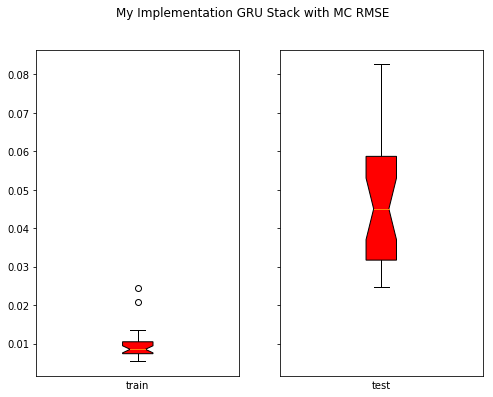

In [8]:
strE = 'RMSE'
dataErr = [getattr(statErr1, strE), getattr(statErr2, strE)]
fig = rnnSMAP.funPost.plotBox(dataErr, labelC=['train', 'test'], title='My Implementation GRU Stack with MC ' + strE)